In [2]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 128
BATCH_SIZE = 32
CHANNEL = 3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
     shuffle = True,
     image_size = (IMAGE_SIZE,IMAGE_SIZE),
     batch_size = BATCH_SIZE
)

Found 4500 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

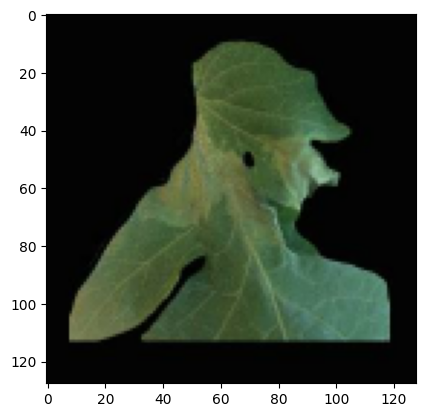

In [6]:
import numpy as np
for image_batch , label_batch in dataset.take(1):
     plt.imshow(image_batch[0].numpy().astype('uint8'))
    # print(label_batch.numpy())

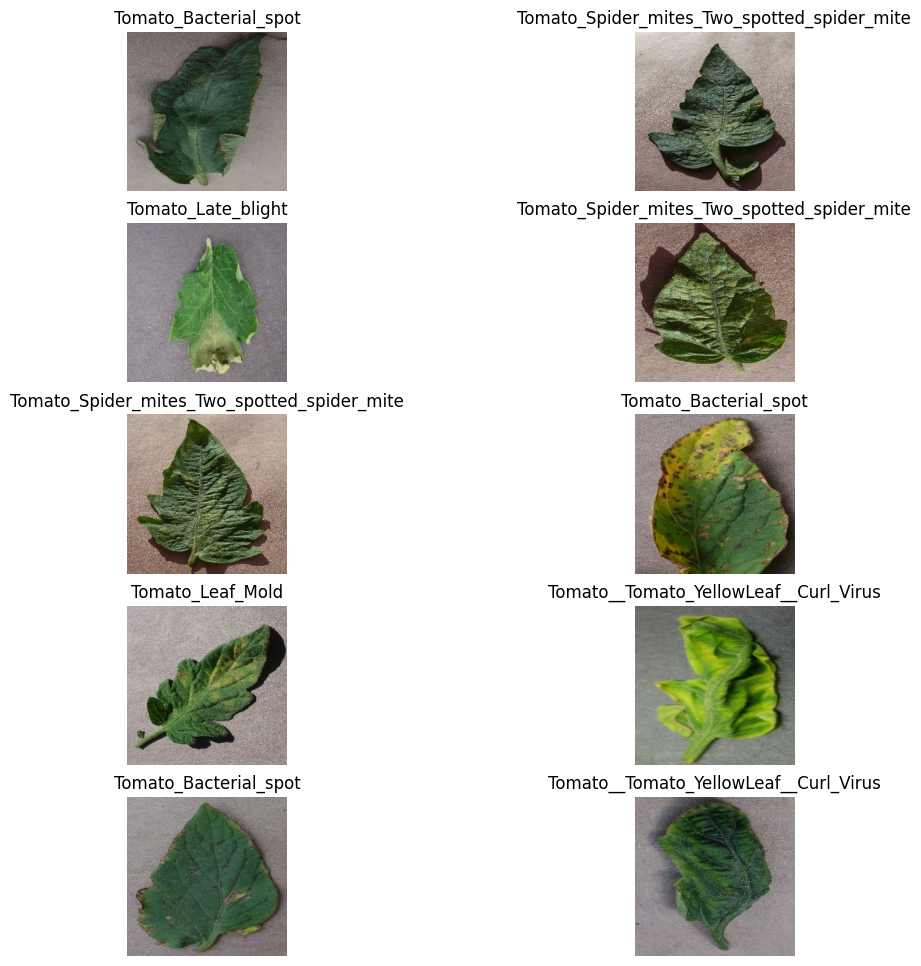

In [27]:
plt.figure(figsize=(12,12))
for image_batch , label_batch in dataset.take(1):
   for i in range(10): 
    ax =  plt.subplot(5,2,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')

In [ ]:
train_size = 0.8
len(dataset) * train_size

train_ds = dataset.take(400)
len(train_ds)

Test_ds = dataset.skip(400)
len(Test_ds)

val_size = 0.1
len(dataset) * val_size

val_ds = Test_ds.take(50)
len(val_ds)

test_ds = Test_ds.skip(50)
len(test_ds)

# Dataset spliting pipeline

In [7]:
def get_dataset_partitions_tf(ds,train_split = 0.8 , val_split = 0.1 , test_split = 0.1 , shuffle = True , shuffle_size = 500):

    ds_size = len(ds)

    if shuffle:
       ds = ds.shuffle(shuffle_size , seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)


    return train_ds , val_ds , test_ds

In [8]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [9]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

112
14
15


In [10]:
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)

# Resizing and Rescaling

In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [16]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 10
CHANNEL = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL))


In [17]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 126, 126, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 63, 63, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 61, 61, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,418 (943.04 KB)

 Trainable params: 241,418 (943.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics = ['accuracy']
)

In [19]:
history = model.fit(
    train_ds,
    epochs = 7,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 657s 5s/step - accuracy: 0.3909 - loss: 1.1789 - val_accuracy: 0.6786 - val_loss: 0.7728
Epoch 2/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 451s 4s/step - accuracy: 0.7370 - loss: 0.6193 - val_accuracy: 0.8571 - val_loss: 0.3654
Epoch 3/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 374s 3s/step - accuracy: 0.8308 - loss: 0.4016 - val_accuracy: 0.7656 - val_loss: 0.5406
Epoch 4/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.8495 - loss: 0.3762 - val_accuracy: 0.8705 - val_loss: 0.3217
Epoch 5/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 359s 3s/step - accuracy: 0.8671 - loss: 0.3295 - val_accuracy: 0.9062 - val_loss: 0.2407
Epoch 6/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 365s 3s/step - accuracy: 0.8853 - loss: 0.2881 - val_accuracy: 0.8795 - val_loss: 0.2422
Epoch 7/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 362s 3s/step - accuracy: 0.8874 - loss: 0.2768 - val_accuracy: 0.8884 - val_loss: 0.2611


In [16]:
scores = model.evaluate(test_ds)

15/15 ━━━━━━━━━━━━━━━━━━━━ 130s 951ms/step - accuracy: 0.8588 - loss: 0.2827


first image to predict
actual label class Tomato_Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step
predicted class Tomato_Early_blight


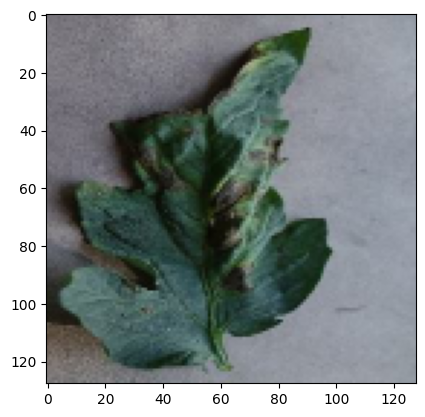

In [20]:
import matplotlib.pyplot as plt
import numpy as np

for image_batch , labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label class',class_names[first_label])

    prediction = model.predict(image_batch)
    print('predicted class',class_names[np.argmax(prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 72s 72s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


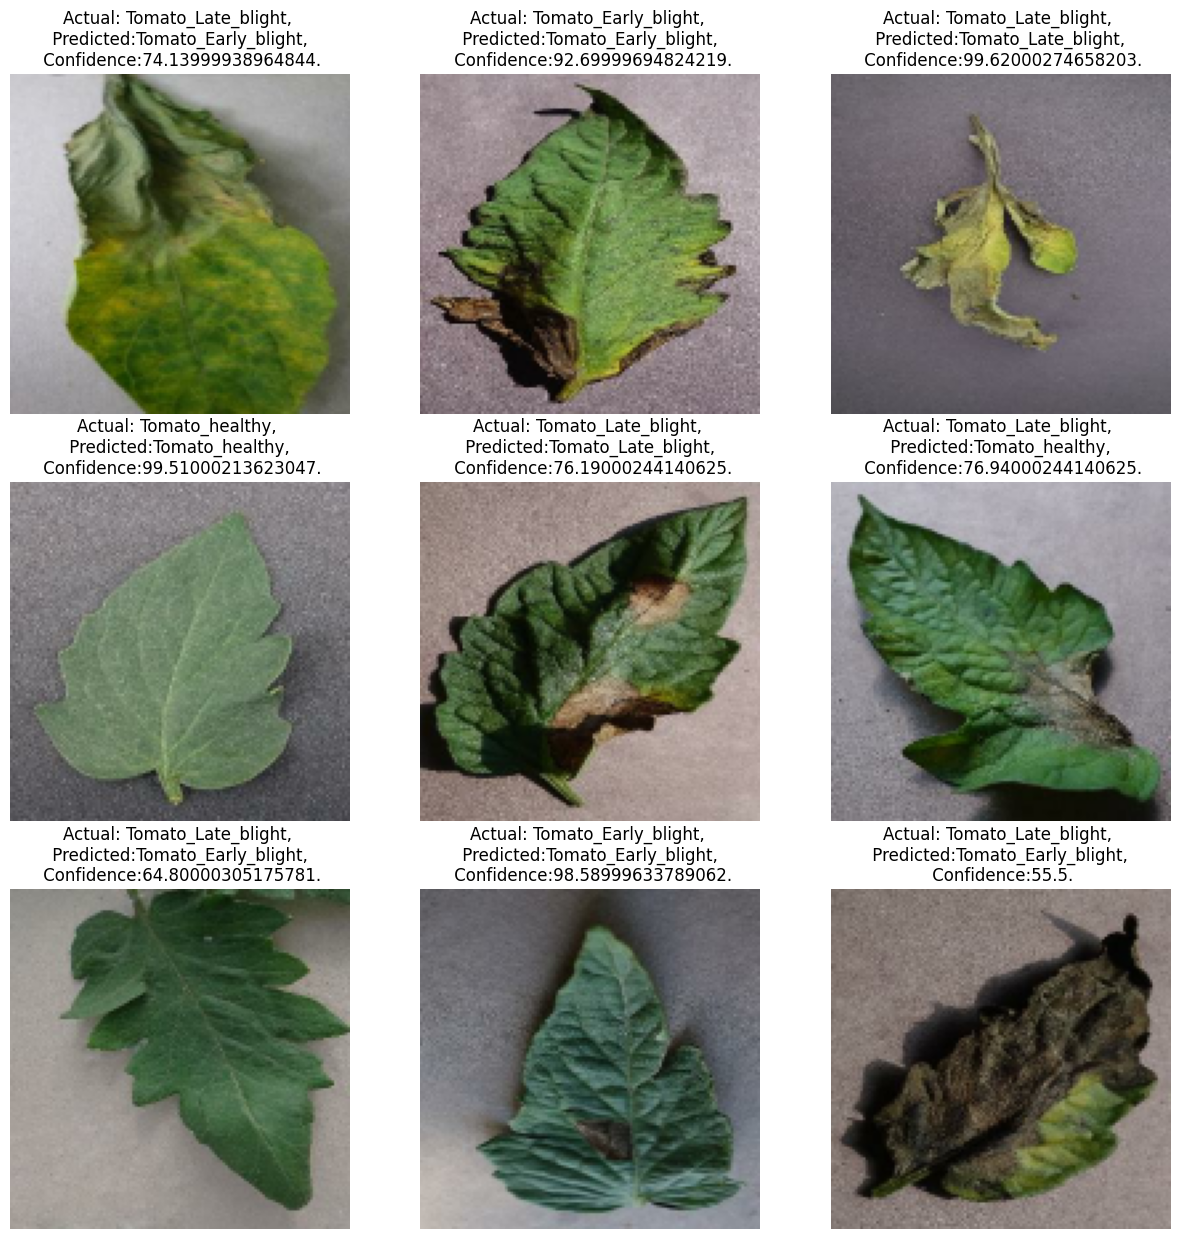

In [20]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    model_predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(model_predictions[0])]
    confidence = round(100 * (np.max(model_predictions[0])) , 2)
    return predicted_class , confidence
 
plt.figure(figsize = (15,15))
for images , labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
       
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class , confidence = predict(model , images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f'Actual: {actual_class}, \n Predicted:{predicted_class}, \n Confidence:{confidence}.')

        plt.axis('off')

In [22]:
import os

model_version = 1
save_path = rf'C:\Users\ADMIN\Desktop\Tomato_disease\models\{model_version}.keras'

# Ensure the directory exists
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Save in .keras format (new Keras format)
model.save(save_path)
print(f"Model saved in .keras format at: {save_path}")


Model saved in .keras format at: C:\Users\ADMIN\Desktop\Tomato_disease\models\1.keras
